<b><font size="6">
Dissecting Amazon Reviews</font>

In [1]:
# Start importing packages
import json
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import numpy

In [2]:
# Read file 8 (for group 23)
data = pd.read_json("reviews_electronics.8.json", lines = True)

In [3]:
# Check first 3 rows
data.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AKM1MP6P0OYPR,0132793040,"Vicki Gibson ""momo4""","[1, 1]",Corey Barker does a great job of explaining Bl...,5,Very thorough,1365811200,"04 13, 2013"
1,ANJ23S7YCEXXH,B003OSP4GA,"Skip Mueller ""Skip""","[2, 2]",Unit is quite lightweight and cheap. Sound is...,2,You get what you pay for,1297209600,"02 9, 2011"
2,A7PD0NACTL19P,B003OSP4GA,S. Steele,"[7, 7]",This is a great player. The sound is good and ...,5,great product,1294531200,"01 9, 2011"


### Treat each review as a document. Ignore misspellings. Convert all reviews to lower case. Remove stop words (use package to do this).

In [6]:
# Converts all the reviews to the lower case
reviews = data["reviewText"].str.lower()

In [4]:
# Replace all the n't with not
reviews = reviews.replace(r"([A-Za-z]+)n't", r"\1 not", regex = True)

In [8]:
# Creates the list of stop words
stop_words = set(stopwords.words('english')) 

In [9]:
len(stop_words)

179

In [10]:
# Removing not from the list of stop words
stop_words.remove("not")

In [7]:
# Removes stop words, punctuations and extra spaces from each element in the list
for i in range(len(reviews)):
    temp = ""
    split = re.split(r'\W+', reviews[i])
    for each in split:
        if each not in stop_words:
            temp += each + " " 
    reviews[i] = temp.strip()

### Handle negation: Look for the following two negations: "not" and "xxxn't" (e.g., don't, didn't etc.). Split off the "n't" part from "xxxn't" into separate words "xxx" and "not". Attach all 'not's (any normal "not" appearing in the text as well as the "n't" converted to "not") to the subsequent word, eg "not_nextword" (code this yourself).

In [5]:
# Replace all the not with the word next to it, not_word
reviews = reviews.replace(r"not\s([a-zA-Z]*)", r"not_\1", regex = True)

### Stem all words using Porter 1979 (use package to do this).

In [11]:
all_reviews = reviews.str.cat(sep = " ")

In [12]:
len(all_reviews)

225716974

In [13]:
# Breaking sentences into words
filtered_words = nltk.word_tokenize(all_reviews)

In [17]:
# Creates a porter stemming object
porter = PorterStemmer()

In [18]:
# Creates a dictionary with all the stem words and their frequency
stem_words = {}
for word in filtered_words:
    root_word = porter.stem(word)
    if root_word in stem_words:
        stem_words[root_word] += 1
    else:
        stem_words[root_word] = 1

In [29]:
stem_words

{'corey': 1,
 'barker': 5,
 'great': 179889,
 'job': 16753,
 'explain': 2122,
 'blend': 532,
 'mode': 12804,
 'dvd': 11085,
 'kelbi': 7,
 'train': 1534,
 'video': 43828,
 'pricey': 1455,
 'buy': 73214,
 'individu': 1794,
 'realli': 70925,
 'want': 63881,
 'bang': 1624,
 'buck': 6464,
 'subscrib': 268,
 'onlin': 8599,
 'unit': 50632,
 'quit': 20258,
 'lightweight': 3594,
 'cheap': 24036,
 'sound': 96501,
 'ok': 12810,
 'unless': 8002,
 'fm': 4079,
 'radio': 15013,
 'not_fil': 142,
 'small': 39266,
 'room': 22358,
 'remot': 23915,
 'control': 28484,
 'not_work': 24304,
 'reliabl': 7265,
 'time': 116655,
 'elaps': 38,
 'indic': 6086,
 'like': 138350,
 'cd': 9295,
 'player': 24390,
 'would': 158622,
 'not_recommend': 5329,
 'basic': 9850,
 'use': 281898,
 'good': 143870,
 'work': 241286,
 'mp3': 7702,
 'even': 59789,
 'charg': 58739,
 'first': 53718,
 'thank': 17649,
 'custom': 20280,
 'post': 5267,
 'review': 56064,
 'help': 23388,
 'purchas': 77848,
 'decis': 2064,
 'make': 65238,
 'proc

### Create frequency count table for all word stems in all reviews (this will be big). Use the most frequent 500 words to define the word vector. Create a bag-of-word vector representation for each review in electronics.

In [19]:
import collections
#sorted_dict = collections.OrderedDict(stem_words.items(),key=operator.itemgetter(1))
sorted_words = collections.OrderedDict(sorted(stem_words.items(), key=lambda t: t[1], reverse = True))

In [30]:
sorted_words

OrderedDict([('use', 281898),
             ('work', 241286),
             ('one', 198845),
             ('great', 179889),
             ('would', 158622),
             ('good', 143870),
             ('like', 138350),
             ('get', 135814),
             ('product', 132179),
             ('time', 116655),
             ('well', 114196),
             ('camera', 105358),
             ('batteri', 101548),
             ('case', 99867),
             ('price', 98038),
             ('sound', 96501),
             ('look', 95068),
             ('need', 93152),
             ('qualiti', 87645),
             ('bought', 79561),
             ('also', 79136),
             ('purchas', 77848),
             ('2', 73940),
             ('buy', 73214),
             ('cabl', 72853),
             ('problem', 71673),
             ('realli', 70925),
             ('set', 70145),
             ('easi', 68246),
             ('much', 67638),
             ('back', 66339),
             ('littl', 65692),
         

In [20]:
words = sorted_words.keys()

In [21]:
top_words = set(list(words)[0:500])

In [22]:
type(top_words)

set

In [23]:
for each in top_words:
    print(each)

shot
network
amaz
item
book
longer
next
15
custom
caus
least
anyon
0
seem
clear
unit
keyboard
either
read
perfectli
high
long
featur
replac
see
play
home
hous
fact
good
cheap
tell
car
expens
signal
2
clean
remov
ca
box
happi
bass
cover
els
even
want
memori
hear
worth
spend
watch
alway
definit
4
laptop
exactli
money
model
wire
touch
rather
receiv
20
fit
monitor
led
awesom
part
store
day
port
adjust
stay
realli
button
len
love
black
simpl
oper
howev
switch
work
kind
review
screw
mani
due
imag
batteri
coupl
strap
decid
hour
way
offer
bad
move
not_th
said
stop
differ
radio
test
tablet
warranti
wish
appl
half
usb
front
screen
far
ok
wireless
mous
extra
not_know
travel
3
seller
mode
nikon
speaker
week
save
not
includ
lot
chang
live
router
record
mayb
head
driver
guess
updat
flash
need
littl
side
check
ship
almost
start
10
look
two
close
tv
attach
bag
experi
instal
iphon
year
know
larg
fix
simpli
first
keep
anyth
addit
heavi
avail
built
card
option
pocket
took
app
time
case
hold
nois
around
q

In [24]:
len(reviews)

500001

In [25]:
temp = reviews

In [26]:
bag_of_vectors = []
for sentence in temp:        
    words = nltk.word_tokenize(sentence)
    given_words = []
    bag_vector = []
    i = 0
    for word in words:
        given_words.append(porter.stem(word))
    for w in top_words:       
        if w in given_words: 
            bag_vector.append(1)                            
        else:
            bag_vector.append(0)
        i += 1
    bag_of_vectors.append(numpy.array(bag_vector))

In [27]:
# As an example, let's look at review 500000
reviews[500000]

'great product 1i loved it it protects my kindal and i am very satisfied with it i recomend this product '

In [28]:
# Let's look at how bag_of_vectors works for this review (shows value of 1 if words are associated with top 500 words)
(bag_of_vectors[500000])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Establish a method for measuring the distance between different reviews. Print the mutual distance between the first 100 reviews (review IDs) to screen, sorted from closest to furthest.

In [31]:
# We will calculate distance using the euclidean method
from scipy.spatial import distance
d = distance.euclidean(bag_of_vectors[0], bag_of_vectors[1])
d

4.898979485566356

In [32]:
bow = numpy.array(bag_of_vectors)

In [33]:
numpy.linalg.norm(bow[0] - bow[1])

4.898979485566356

In [34]:
import scipy.spatial.distance as scipydist
# Computes euclidean pairwise distances between observations in n-dimensional space
review_dist = scipydist.cdist(bow[0:100], bow[0:100], metric='euclidean') 
review_dist

array([[0.        , 4.89897949, 3.60555128, ..., 5.56776436, 4.69041576,
        3.46410162],
       [4.89897949, 0.        , 4.58257569, ..., 6.08276253, 5.29150262,
        4.69041576],
       [3.60555128, 4.58257569, 0.        , ..., 5.29150262, 4.58257569,
        3.60555128],
       ...,
       [5.56776436, 6.08276253, 5.29150262, ..., 0.        , 5.56776436,
        5.        ],
       [4.69041576, 5.29150262, 4.58257569, ..., 5.56776436, 0.        ,
        4.24264069],
       [3.46410162, 4.69041576, 3.60555128, ..., 5.        , 4.24264069,
        0.        ]])

In [35]:
review_dist[0:2]

array([[ 0.        ,  4.89897949,  3.60555128,  7.87400787,  4.89897949,
         5.74456265,  5.09901951,  5.56776436,  4.24264069,  5.38516481,
         5.09901951,  4.89897949,  7.93725393,  6.164414  ,  3.46410162,
         6.32455532,  4.79583152,  3.87298335,  5.09901951,  6.164414  ,
         5.56776436,  4.47213595,  4.47213595,  4.89897949,  4.35889894,
         6.08276253,  4.        ,  5.09901951,  4.        ,  4.47213595,
         8.24621125,  4.35889894,  4.12310563,  4.        ,  6.78232998,
         7.        ,  5.        ,  4.12310563,  4.35889894,  5.38516481,
         6.40312424,  5.47722558,  5.47722558,  4.24264069,  4.        ,
         5.        ,  4.79583152,  3.87298335,  7.07106781,  4.79583152,
         4.79583152,  6.244998  ,  6.4807407 ,  4.79583152,  3.46410162,
         4.12310563,  3.31662479,  4.24264069,  4.58257569,  6.32455532,
         4.89897949,  4.47213595,  7.54983444,  4.47213595,  3.87298335,
         4.69041576,  4.35889894,  5.09901951,  4.1

In [36]:
# Show distance between first 100 reviews
x = review_dist[0:100]
i = numpy.argsort(x)
print(i + 1)

[[  1  57  90 ...  31  86  80]
 [  2   3  57 ...  86  31  80]
 [  3  57  55 ...  77  86  80]
 ...
 [ 98  58  27 ...  77   4  80]
 [ 99  15  27 ...  31  77  80]
 [100  83  57 ...   4  86  80]]


In [79]:
review_dist_temp = review_dist
sorted_dist = numpy.sort(review_dist_temp)
sorted_dist[0:100, 1:100]

array([[ 3.31662479,  3.46410162,  3.46410162, ...,  8.24621125,
         8.54400375, 10.14889157],
       [ 4.58257569,  4.58257569,  4.58257569, ...,  8.54400375,
         8.71779789, 10.04987562],
       [ 2.44948974,  3.31662479,  3.31662479, ...,  8.06225775,
         8.36660027, 10.19803903],
       ...,
       [ 4.58257569,  4.58257569,  4.69041576, ...,  8.30662386,
         8.77496439,  9.79795897],
       [ 4.        ,  4.24264069,  4.24264069, ...,  8.36660027,
         8.48528137, 10.14889157],
       [ 3.16227766,  3.31662479,  3.31662479, ...,  8.        ,
         8.06225775, 10.04987562]])

### Run a PCA and graph the first two PCs for the first 100 reviews. Does your graph reflect your findings from the previous exercise?

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [38]:
principalComponents = pca.fit_transform(bag_of_vectors[0:100])

In [39]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-1.015394,0.505658
1,-0.274968,0.835876
2,-1.017826,0.320577
3,1.413559,2.569985
4,0.057116,-0.285985
...,...,...
95,-0.754206,0.034209
96,-0.633299,-0.073099
97,0.739993,-0.483067
98,-0.610604,0.233731


In [40]:
# Import packages to plot

import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# Create vector to label each review on the plot
types = list(range(1,101))

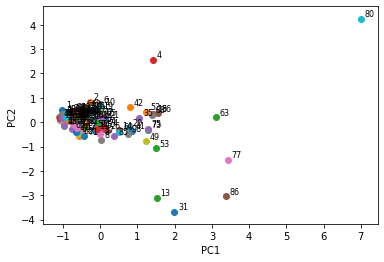

In [42]:
# Plot PC2 (y-axis) vs. PC1 (x-axis)
for i,type in enumerate(types):
    x = principalDf['principal component 1'][i]
    y = principalDf['principal component 2'][i]
    plt.scatter(x,y)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.text(x+0.1,y+0.1,type,fontsize=8)

plt.show()

In [ ]:
# According to the above figure, reviews 49 and 53 or 42 and 35 are quite similar.

In [ ]:
# Let's check those reviews from our euclidean distance approach

In [46]:
x49 = review_dist[48:49]
i = numpy.argsort(x49)
print(i + 1)

[[ 49  34  72  18  56  65 100  30  22  27  71  79  90  38  37  84  33  69
   83  45  44  97  55   1   9  25  39  57  59  87  67  76  32   7  12   5
   91  92  96  70  15  62  23  48   3  17  68  19  93  24  61  29  58  66
   78  10  50  94  42  64  54  89  51  47  98  40  85  43  99  11  46  21
    2  82  95   8  81  20  28  41  74   6  16  60  53  88  52  14  75  26
   35  63  73  36  77  13  86  31   4  80]]


In [ ]:
# We notice that reviews 49 and 53 are not very close

In [47]:
x42 = review_dist[41:42]
i = numpy.argsort(x42)
print(i + 1)

[[ 42  33  55  72  27  79  34   9 100  97  69  65  57  56  76  67  90  62
   61  92  45  96   1  15  18  25  38  48  87   3  17  84  44  83  91  30
   29  23  99  19  59  46  50  32  39  89  70  22  58   5  78  40  37   7
   85  71  12  68  64  66  51  47  10  98   2  82  24  11  54  94  95   8
   43  93  16  28  21  41  74  26  20  35  60  53  52   6  14  88  81  73
   63  75  36  49  86  77   4  13  31  80]]


In [49]:
# We notice that reviews 42 and 35 are also not very close

### Is it possible to use logistic regression to predict the rating (5 levels) of a product? Why may it be advantageous to use a logistic regression to predict the 5-star rating over MNL with 5 categories? 

Yes it’s possible to use logistic regression to predict the rating of a product with 5 levels. It’s a common misconception that a logistic regression implies a binary interpretation (0/1). The output is actually always a number that’s always higher than 0 and lower than 1. The output may then be associated into bins, for e.g. 0 < x < 0.2 can be associated with a star rating of 1, 0.2 ≤ x < 0.4 can be associated with a star rating of 2 and so on.

The dependent variable (star rating) is an ordered category where a star rating of 5 > star rating of 4. When the dependent variable is ordered, you could run either regression; however, with an MNL we will end up throwing away information about the ordering. Thus, using logistic regression is more ideal for this situation.

### Perform a lasso logistic regression and measure the out-of-sample accuracy of your method of choice. 

In [62]:
X = pd.DataFrame(bag_of_vectors)
y = data["overall"]

In [92]:
# Import neccessary packages
import numpy
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import mord
from mord import LogisticAT
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.6, random_state=31)

In [95]:
log_lasso = LogisticAT(alpha=1.0).fit(X_train, y_train)

In [96]:
MAE = make_scorer(mean_absolute_error)
MAE_ordinal = cross_val_score(log_lasso, X_test, y_test, cv = 3, scoring=MAE)
print('Ordered logistic regression mean absolute error: ', numpy.mean(MAE_ordinal))

Ordered logistic regression mean absolute error:  0.6650911155888442


### Implement a method to aggregate reviews by product. Can you use any of the other columns to help with aggregation? Explain why or why not. Please clearly explain your method. 

In [50]:
# Group by asin, concatenating all reviews
agg_asin_data = data.groupby(['asin'])['reviewText'].apply(lambda x: ' '.join(x)).reset_index()

### Establish a method for measuring the distance between different products. 

In [53]:
# Converts all the reviews to the lower case
reviews_agg = agg_asin_data["reviewText"].str.lower()

In [54]:
# Removes stop words, punctuations and extra spaces from each element in the list
for i in range(len(reviews_agg)):
    temp = ""
    split = re.split(r'\W+', reviews_agg[i])
    for each in split:
        if each not in stop_words:
            temp += each + " " 
    reviews_agg[i] = temp.strip()

In [51]:
# Replace all the n't with not
reviews_agg = reviews_agg.replace(r"([A-Za-z]+)n't", r"\1 not", regex = True)

In [52]:
# Replace all the not with the word next to it, not_word
reviews_agg = reviews_agg.replace(r"not\s([a-zA-Z]*)", r"not_\1", regex = True)

In [57]:
all_reviews_agg = reviews_agg.str.cat(sep = " ")

In [58]:
# Breaking sentences into words
words_agg = nltk.word_tokenize(all_reviews_agg)

In [65]:
# Creates a dictionary with all the stem words and their frequency
stem_words_agg = {}
for word in filtered_words_agg:
    root_word = porter.stem(word)
    if root_word in stem_words_agg:
        stem_words_agg[root_word] += 1
    else:
        stem_words_agg[root_word] = 1

In [68]:
sorted_words_agg = collections.OrderedDict(sorted(stem_words_agg.items(), key=lambda t: t[1], reverse = True))

In [69]:
words_agg = sorted_words_agg.keys()

In [70]:
top_words_agg = set(list(words_agg)[0:500])

In [71]:
for each in top_words_agg:
    print(each)

shot
network
amaz
item
book
longer
next
15
custom
caus
least
anyon
0
seem
clear
unit
keyboard
either
read
perfectli
high
long
featur
replac
see
play
home
hous
fact
good
cheap
tell
car
expens
signal
2
clean
remov
ca
box
happi
bass
cover
els
even
want
memori
hear
worth
spend
watch
alway
definit
4
laptop
exactli
money
model
wire
touch
rather
receiv
20
fit
monitor
led
awesom
part
store
day
port
adjust
stay
realli
button
len
love
black
simpl
oper
howev
switch
work
kind
review
screw
mani
due
imag
batteri
coupl
strap
decid
hour
way
offer
bad
move
not_th
said
stop
differ
radio
test
tablet
warranti
wish
appl
half
usb
front
screen
far
ok
wireless
mous
extra
not_know
travel
3
seller
mode
nikon
speaker
week
save
not
includ
lot
chang
live
router
record
mayb
head
driver
guess
updat
flash
need
littl
side
check
ship
almost
start
10
look
two
close
tv
attach
bag
experi
instal
iphon
year
know
larg
fix
simpli
first
keep
anyth
addit
heavi
avail
built
card
option
pocket
took
app
time
case
hold
nois
around
q

In [72]:
temp_agg = reviews_agg

In [73]:
bag_of_vectors_agg = []
for sentence in temp_agg:        
    words_agg = nltk.word_tokenize(sentence)
    given_words = []
    bag_vector = []
    i = 0
    for word in words_agg:
        given_words.append(porter.stem(word))
    for w in top_words_agg:       
        if w in given_words: 
            bag_vector.append(1)                            
        else:
            bag_vector.append(0)
        i += 1
    bag_of_vectors_agg.append(numpy.array(bag_vector))

In [75]:
bow_agg = numpy.array(bag_of_vectors_agg)

In [77]:
import scipy.spatial.distance as scipydist
# Computes euclidean pairwise distances between observations in n-dimensional space
product_dist = scipydist.cdist(bow_agg[0:100], bow_agg[0:100], metric='euclidean') 
product_dist

array([[ 0.        ,  8.48528137, 19.4422221 , ..., 13.07669683,
        11.13552873,  9.2736185 ],
       [ 8.48528137,  0.        , 18.43908891, ..., 12.84523258,
        11.22497216, 10.67707825],
       [19.4422221 , 18.43908891,  0.        , ..., 16.70329309,
        16.85229955, 17.94435844],
       ...,
       [13.07669683, 12.84523258, 16.70329309, ...,  0.        ,
        12.76714533, 13.07669683],
       [11.13552873, 11.22497216, 16.85229955, ..., 12.76714533,
         0.        , 11.83215957],
       [ 9.2736185 , 10.67707825, 17.94435844, ..., 13.07669683,
        11.83215957,  0.        ]])

In [78]:
x_agg = product_dist[0:10]
i = numpy.argsort(x_agg)
print(i + 1)

[[  1  11  38  69  97  49  65  75  82  37  87  64  57  71  66  58  43  23
   30  76  89  50   6  55  59  88  47  93  68  73  78  21  24  77  72  81
   74  96  14  26  22  17  42  91  53  90  79  92  62  51  83  70  61  25
   35  15  36  32  67  94  45  16   7   4   2   9  63  12  44  84  95   5
   85 100  80  48  41  19  33  86  29  10  99  13  60  27  34  56  31  98
   54  28  20  46  18  39  52   8   3  40]
 [  2  97  38  11  66  65   1  57   6  43  75  55  37  49  64  24  72  82
   69  76  87  89  71  30  50  47  93  59  68  23  78  17  21  58  73  74
   77  42  88  79  26  90  81  51  92  53  14  62  91  22  25  96  83  70
   15  16  35  61   4  94  45  36  67   7  12  63  95  32   9   5  44  85
   80 100  84  86  33  29  48  41  99  19  10  60  27  34  13  31  56  98
   54  28  20  18  46  39  52   3   8  40]
 [  3   8  52  40  46  39  18  20  28  54  56  27  60  31  13  34  98  99
   10  86  29  19  41  48  85  95  33  84  80   5 100  67  44  63  45  12
    9   7  16  94   2   4 

In [80]:
product_dist_temp = product_dist
sorted_prod_dist = numpy.sort(product_dist_temp)
sorted_prod_dist[0:100, 1:100]

array([[ 2.82842712,  3.16227766,  3.46410162, ..., 19.39071943,
        19.4422221 , 21.23676058],
       [ 8.36660027,  8.36660027,  8.36660027, ..., 18.43908891,
        18.49324201, 19.67231557],
       [ 9.38083152, 10.53565375, 10.72380529, ..., 19.54482029,
        19.54482029, 19.59591794],
       ...,
       [12.52996409, 12.56980509, 12.60952021, ..., 16.64331698,
        16.70329309, 17.20465053],
       [10.72380529, 10.81665383, 10.81665383, ..., 16.85229955,
        16.85229955, 18.30300522],
       [ 9.05538514,  9.16515139,  9.16515139, ..., 17.94435844,
        17.94435844, 19.46792233]])

In [85]:
# Based on above product 1 is closest to product 11 for example.
# Let's grab the asins of these products
agg_asin_data.head(11)

,asin,reviewText
0,0132793040,Corey Barker does a great job of explaining Bl...
1,B003OSP4GA,Unit is quite lightweight and cheap. Sound is...
2,B003OSPCJO,Because of negative reviews I tested it as soo...
3,B003OSPEXI,I love this Jawbone for many reasons. It is s...
4,B003OSPOO2,It sounded to good to be true for the price (a...
5,B003OSPSA2,"After using it a number of times so far, i hav..."
6,B003OSQ8CO,"I bought this kit mostly for the UV filter, mo..."
7,B003OSR6E8,The strap broke after only 3 days. Twice I tri...
8,B003OSRGTS,I am a tech and have repaced many of RAM madua...
9,B003OSRGZM,The 4 people that gave this crap 5 star review...


In [ ]:
# Asins 0132793040 and B003OSS8OA